In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
pca_data = pd.read_csv("Q1 - test.csv")

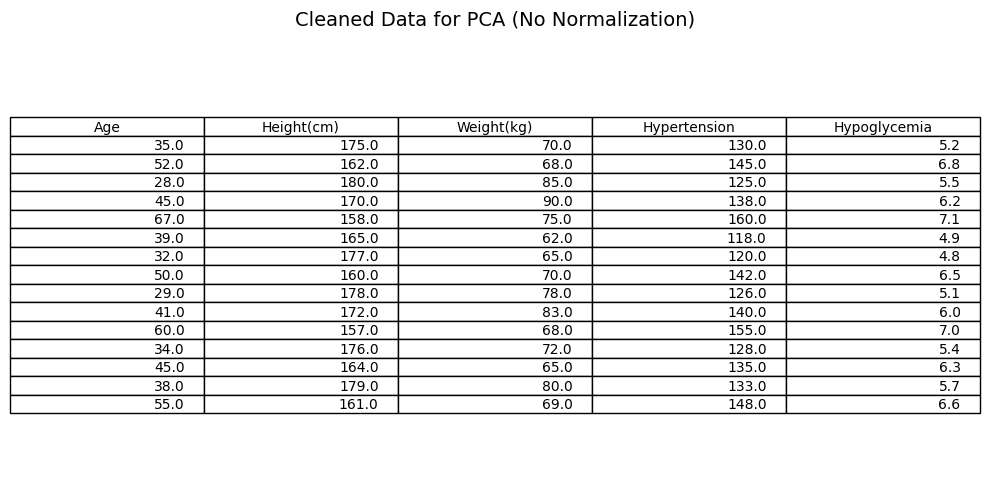

In [59]:
pca_ready_data = pca_data[['Age', 'Height(cm)', 'Weight(kg)', 'Hypertension', 'Hypoglycemia']]

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=pca_ready_data.values,
                 colLabels=pca_ready_data.columns,
                 loc='center')

plt.title("Cleaned Data for PCA (No Normalization)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

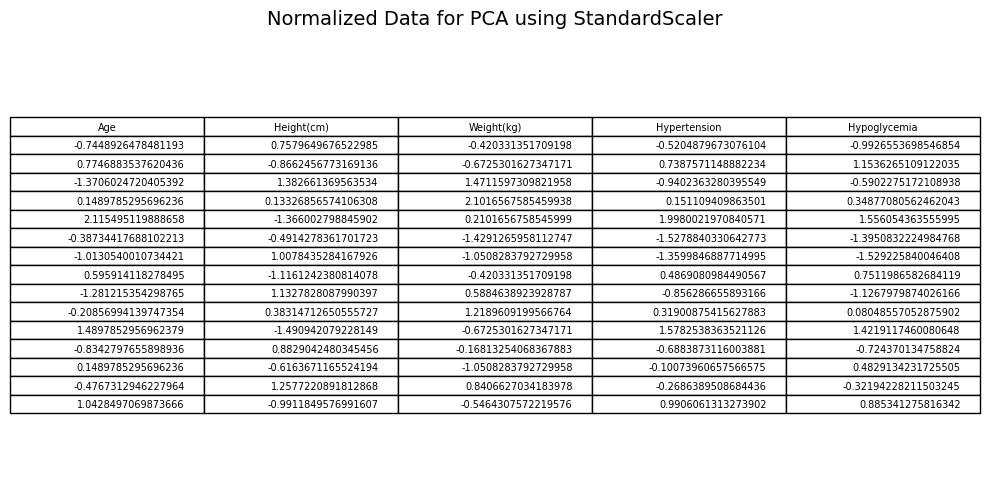

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_ready_data)

scaled_df = pd.DataFrame(scaled_data, columns=pca_ready_data.columns)

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=scaled_df.values,
                 colLabels=scaled_df.columns,
                 loc='center')

plt.title("Normalized Data for PCA using StandardScaler", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

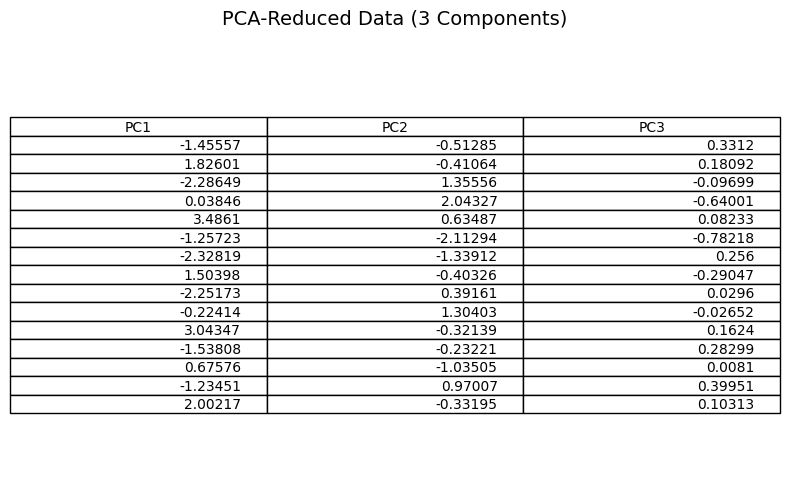

Eigenvalues:
[3.91690747 1.24293796 0.11487789]

Eigenvectors (Principal Components):
PC1: [ 0.51573539 -0.48318994 -0.10547508  0.49260208  0.49675214]
PC2: [-0.01341545  0.27524702  0.90050012  0.25099213  0.22396781]
PC3: [-0.08238733  0.71840424 -0.41108772  0.52693669  0.17450583]

Explained Variance Ratio:
[0.73115606 0.23201509 0.02144387]


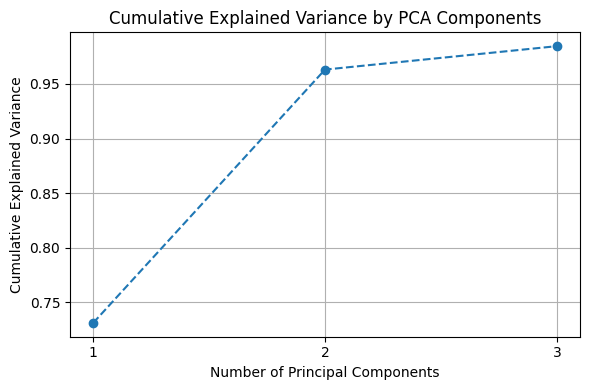

In [61]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=pca_df.round(5).values,
                 colLabels=pca_df.columns,
                 loc='center')

plt.title("PCA-Reduced Data (3 Components)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors (Principal Components):")
for i, vec in enumerate(eigenvectors):
    print(f"PC{i+1}:", vec)

print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 4), cumulative_variance, marker='o', linestyle='--')
plt.xticks([1, 2, 3])
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA Components")
plt.grid(True)
plt.tight_layout()
plt.show()


Centroids (in PC1, PC2, PC3 space):
[[-1.76615954 -0.76110116  0.02352121]
 [ 2.08958062 -0.31123496  0.04106766]
 [-0.9266715   1.41822889 -0.09100301]]


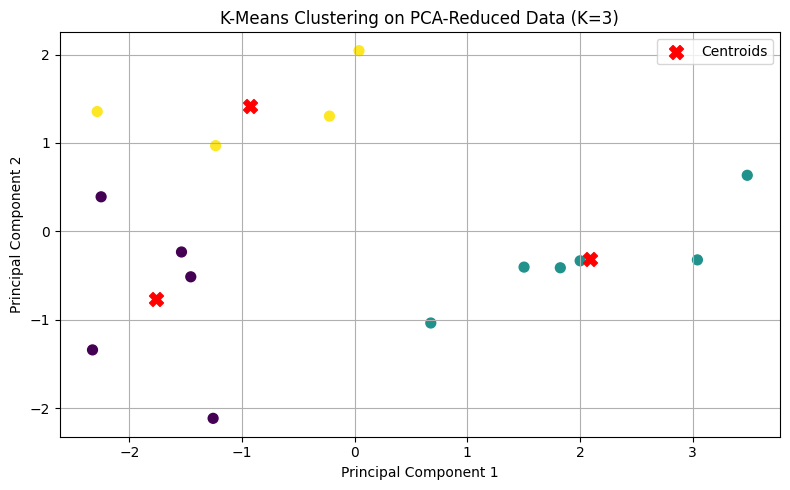

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_df)

pca_df['Cluster'] = clusters

centroids = kmeans.cluster_centers_
print("Centroids (in PC1, PC2, PC3 space):")
print(centroids)

plt.figure(figsize=(8, 5))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data (K=3)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
